## Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Color,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('Grade', axis=1))

StandardScaler()

In [6]:
scaled_feature = scaler.transform(df.drop('Grade', axis=1))

In [7]:
df_feat = pd.DataFrame(scaled_feature, columns=df.columns[:-1])
df_feat.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Color
0,-0.021531,-0.914107,0.910503,-0.872962,0.699608,-0.982217,0.501600
1,-0.021531,-0.815035,-1.098294,1.145525,-1.429372,1.018105,0.269333
2,1.336564,2.553438,0.910503,1.145525,0.699608,1.018105,-1.356536
3,2.051351,-1.013180,0.910503,1.145525,-1.429372,1.018105,0.733867
4,-0.021531,-0.715962,-1.098294,-0.872962,-1.429372,-0.982217,0.733867


## Pair Plot

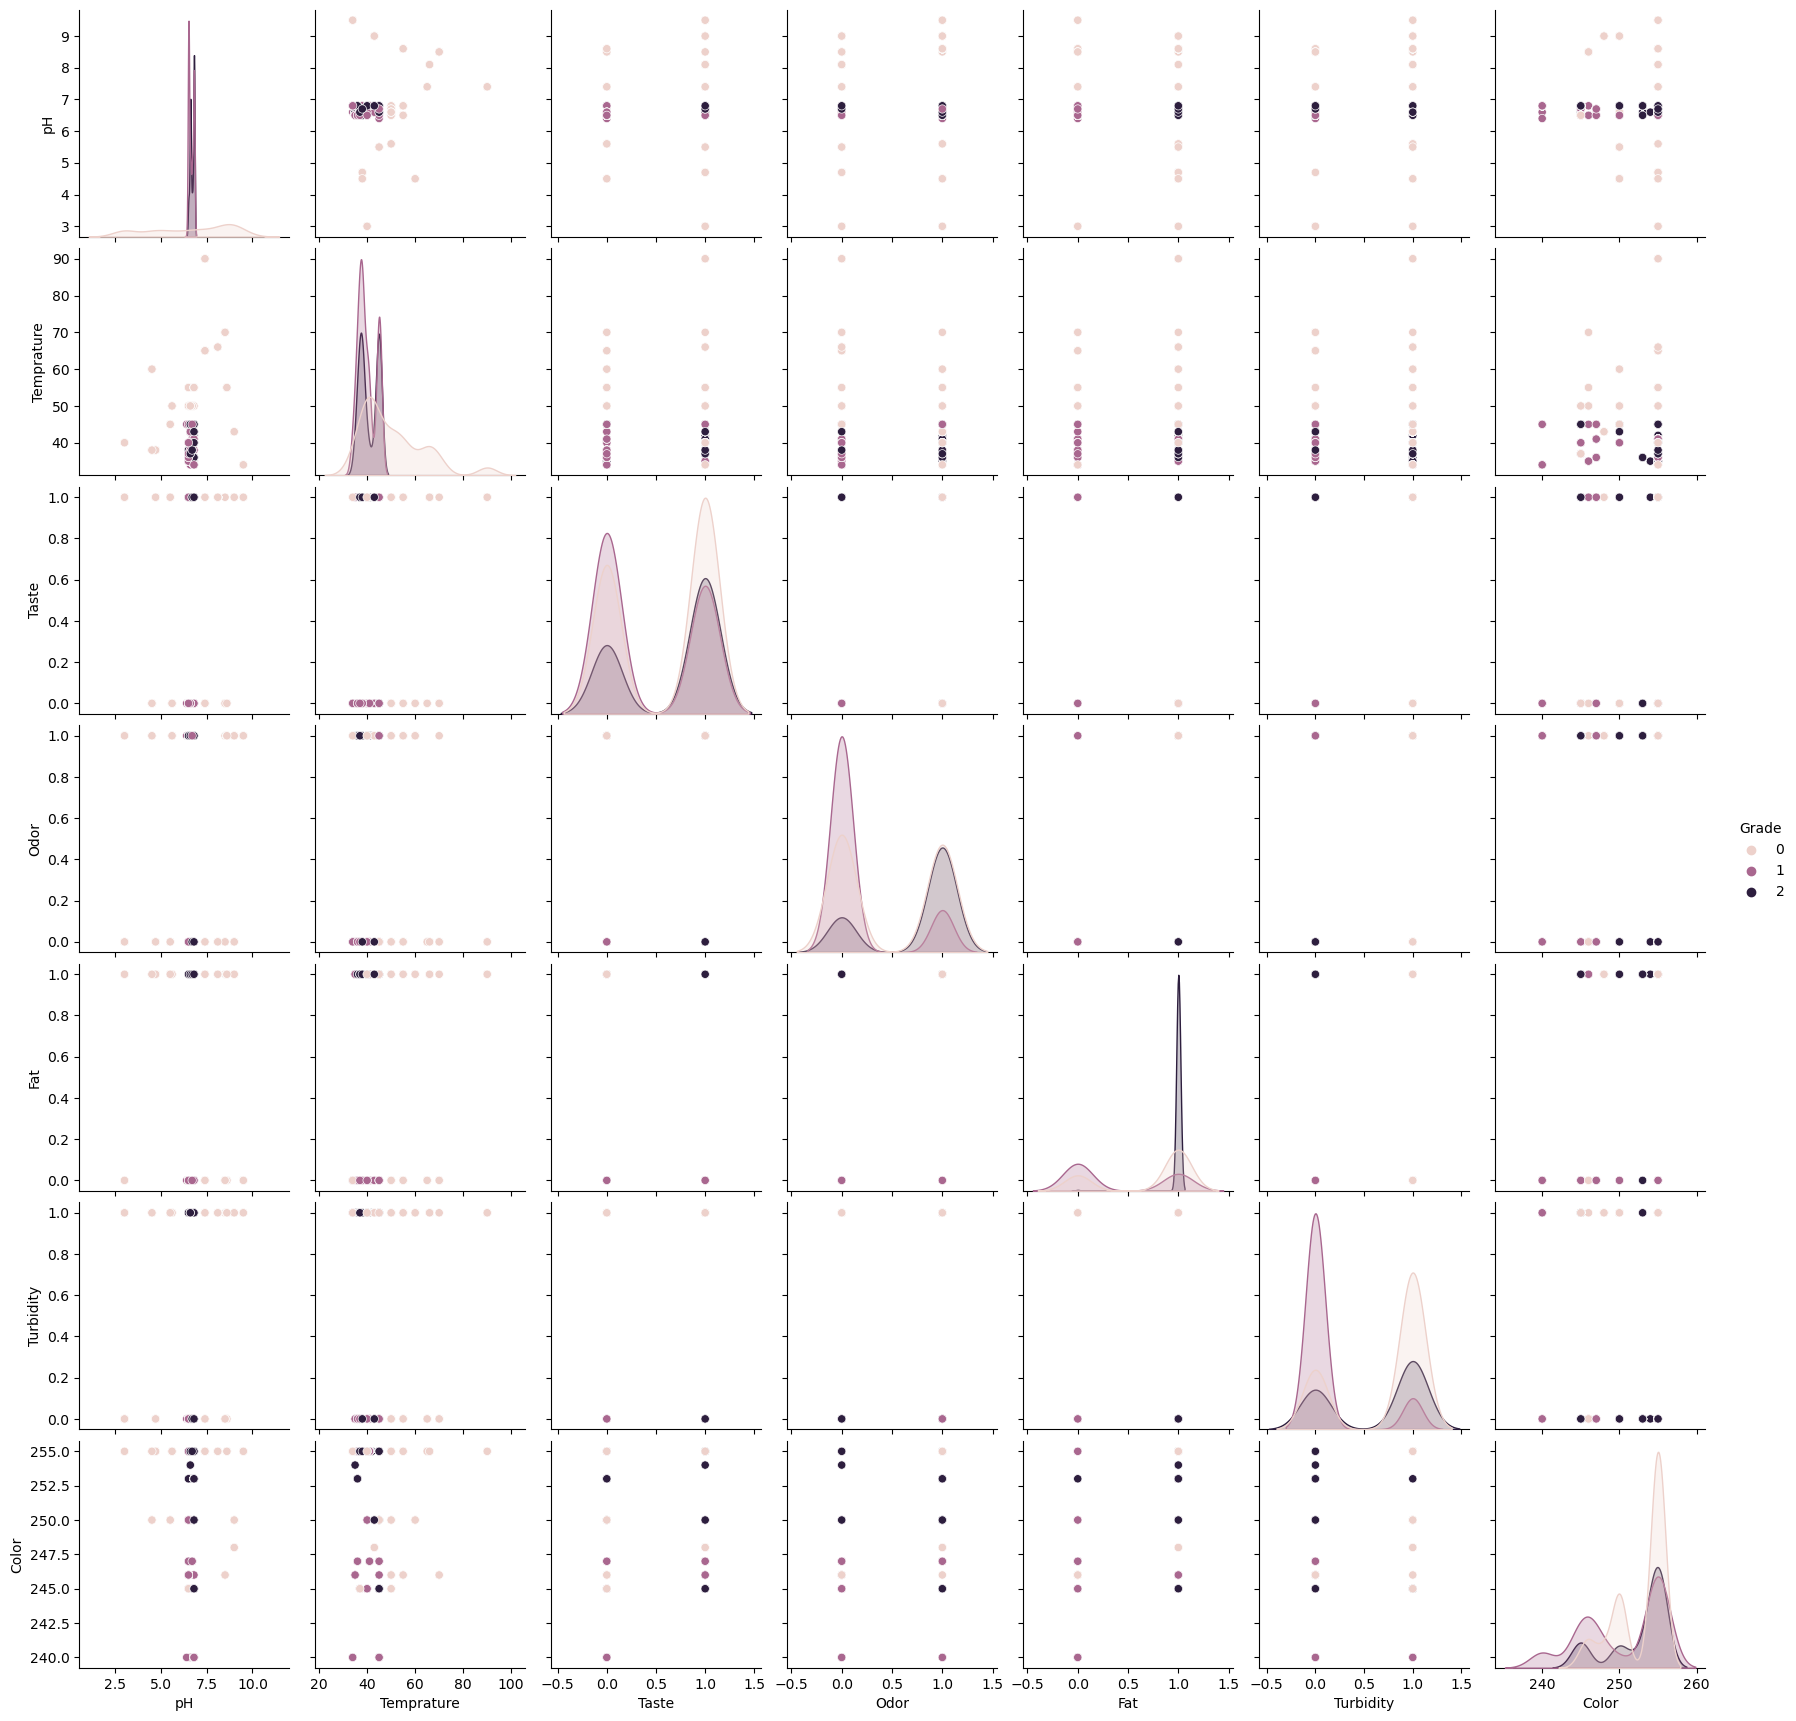

In [8]:
sns.pairplot(df, hue='Grade')

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(scaled_feature, df['Grade'], test_size=0.3)

## Using KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
Knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
pred = Knn.predict(x_test)

## Prediction And Evaluation

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [16]:
print(confusion_matrix(y_test,pred))

[[128   0   0]
 [  0 113   0]
 [  0   0  77]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       113
           2       1.00      1.00      1.00        77

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



## Choosing a K value

In [18]:
accuracy_rate = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,df_feat,df['Grade'],cv=10)
    accuracy_rate.append(score.mean())

In [19]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Grade'],cv=10)
    error_rate.append(1-score.mean())

In [20]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Accuracy')

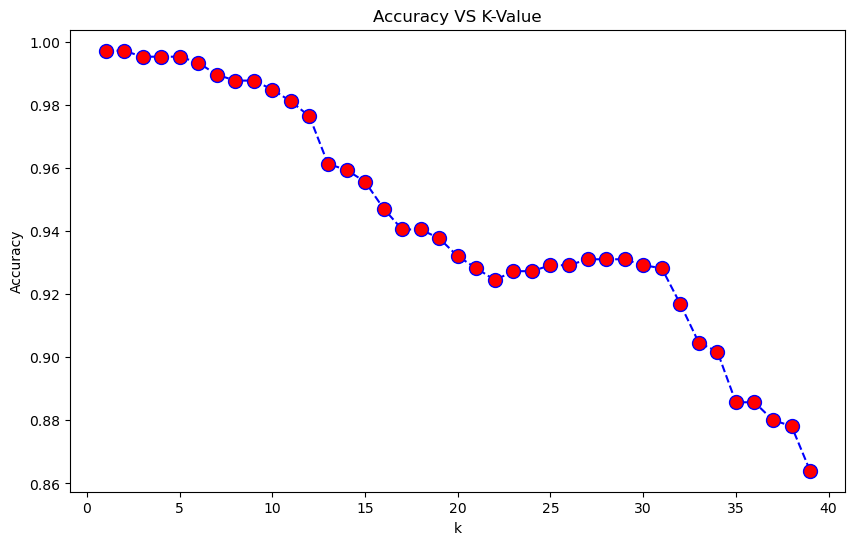

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='Blue', linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)
plt.title("Accuracy VS K-Value")
plt.xlabel('k')
plt.ylabel('Accuracy')

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
Knn = KNeighborsClassifier(n_neighbors=1)
Knn.fit(x_train,y_train)
pred = Knn.predict(x_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
      

WITH K=1


[[128   0   0]
 [  0 113   0]
 [  0   0  77]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       113
           2       1.00      1.00      1.00        77

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



In [37]:
Knn = KNeighborsClassifier(n_neighbors=10)
Knn.fit(x_train,y_train)
pred = Knn.predict(x_test)
print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[125   3   0]
 [  0 113   0]
 [  4   0  73]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       128
           1       0.97      1.00      0.99       113
           2       1.00      0.95      0.97        77

    accuracy                           0.98       318
   macro avg       0.98      0.97      0.98       318
weighted avg       0.98      0.98      0.98       318

